# Welcome to Microsoft Stock Price Prediciton Model 
**Caution** dont use my model to make investments in their stocks :D

In [2]:
import pandas as pd

df = pd.read_csv('MSFT_stock.csv')

df

,Date,open,high,low,close,volume
0,16-03-2001,26.25000,27.56250,26.24219,27.28125,112848800
1,19-03-2001,27.25000,27.75000,26.56250,27.15625,61036400
2,20-03-2001,27.28125,28.06250,26.31250,26.34375,91822800
3,21-03-2001,26.12500,26.62500,24.87500,25.03125,124988600
4,22-03-2001,25.28125,27.03125,25.25000,27.00000,126363200
...,...,...,...,...,...,...
4995,25-01-2021,229.12000,229.78000,224.22000,229.53000,33152095
4996,26-01-2021,231.86000,234.17999,230.08000,232.33000,48699200
4997,27-01-2021,238.00000,240.44000,230.14000,232.89999,69757500
4998,28-01-2021,235.61000,242.64000,235.09000,238.92999,48990000


In [3]:

df = df[['Date', 'close']]

df

,Date,close
0,16-03-2001,27.28125
1,19-03-2001,27.15625
2,20-03-2001,26.34375
3,21-03-2001,25.03125
4,22-03-2001,27.00000
...,...,...
4995,25-01-2021,229.53000
4996,26-01-2021,232.33000
4997,27-01-2021,232.89999
4998,28-01-2021,238.92999


In [10]:
df['Date']

0       16-03-2001
1       19-03-2001
2       20-03-2001
3       21-03-2001
4       22-03-2001
           ...    
4995    25-01-2021
4996    26-01-2021
4997    27-01-2021
4998    28-01-2021
4999    29-01-2021
Name: Date, Length: 5000, dtype: object

In [12]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  day, month, year = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(day=day, month=month, year=year)

datetime_object = str_to_datetime('16-03-2001')
datetime_object

datetime.datetime(2001, 3, 16, 0, 0)

In [13]:
df

,Date,close
0,16-03-2001,27.28125
1,19-03-2001,27.15625
2,20-03-2001,26.34375
3,21-03-2001,25.03125
4,22-03-2001,27.00000
...,...,...
4995,25-01-2021,229.53000
4996,26-01-2021,232.33000
4997,27-01-2021,232.89999
4998,28-01-2021,238.92999


In [14]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

C:\Users\Divyansh Kumar\AppData\Local\Temp\ipykernel_5496\2565755782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      2001-03-16
1      2001-03-19
2      2001-03-20
3      2001-03-21
4      2001-03-22
          ...    
4995   2021-01-25
4996   2021-01-26
4997   2021-01-27
4998   2021-01-28
4999   2021-01-29
Name: Date, Length: 5000, dtype: datetime64[ns]

In [17]:
df.index = df.pop('Date')
df

,close
Date,
2001-03-16,27.28125
2001-03-19,27.15625
2001-03-20,26.34375
2001-03-21,25.03125
2001-03-22,27.00000
...,...
2021-01-25,229.53000
2021-01-26,232.33000
2021-01-27,232.89999


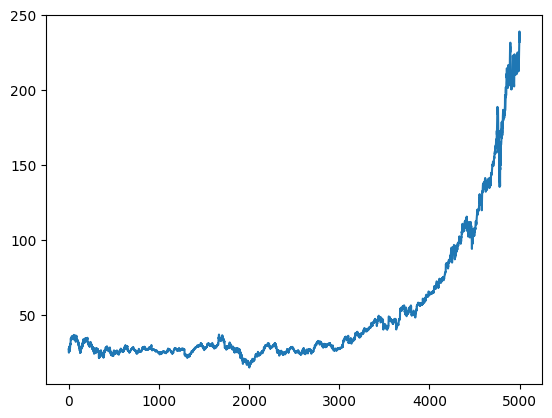

In [16]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['close'])

In [18]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df,
                                '25-01-2020',
                                '29-01-2021',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2020-01-25,166.50000,165.70000,166.72000,165.03999
1,2020-01-28,166.72000,165.03999,162.28000,165.46001
2,2020-01-29,165.03999,162.28000,165.46001,168.03999
3,2020-01-30,162.28000,165.46001,168.03999,172.78000
4,2020-01-31,165.46001,168.03999,172.78000,170.23000
...,...,...,...,...,...
251,2021-01-25,224.34000,224.97000,225.95000,229.53000
252,2021-01-26,224.97000,225.95000,229.53000,232.33000
253,2021-01-27,225.95000,229.53000,232.33000,232.89999
254,2021-01-28,229.53000,232.33000,232.89999,238.92999


In [19]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((256,), (256, 3, 1), (256,))

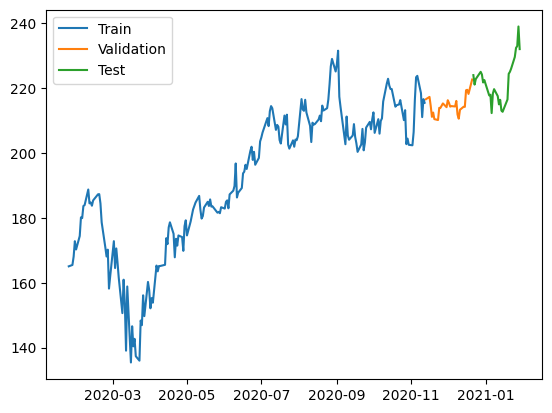

In [20]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 36379.9531 - mean_absolute_error: 189.4579 - val_loss: 45635.9609 - val_mean_absolute_error: 213.6059
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 36282.5312 - mean_absolute_error: 189.2495 - val_loss: 45276.0781 - val_mean_absolute_error: 212.7618
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 36573.0898 - mean_absolute_error: 189.9433 - val_loss: 44826.6680 - val_mean_absolute_error: 211.7030
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 36133.3555 - mean_absolute_error: 188.8053 - val_loss: 44300.0000 - val_mean_absolute_error: 210.4555
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 34703.7188 - mean_absolute_error: 184.8147 - val_loss: 43711.8906 - val_mean_absolute_error: 209.0536
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 34509.0234 - mean_absolute_error: 184.4708 - val_loss: 42876.2656 - val_mean_absolute_error: 207.0453
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/s

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


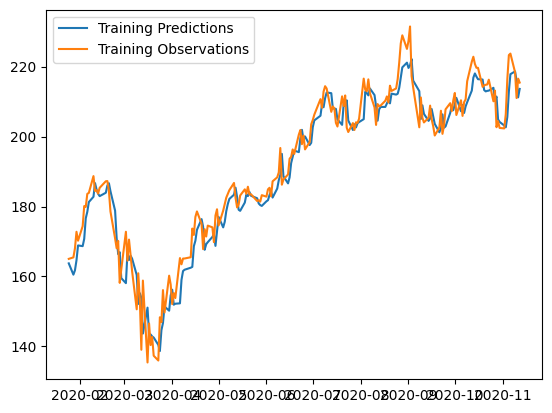

In [22]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


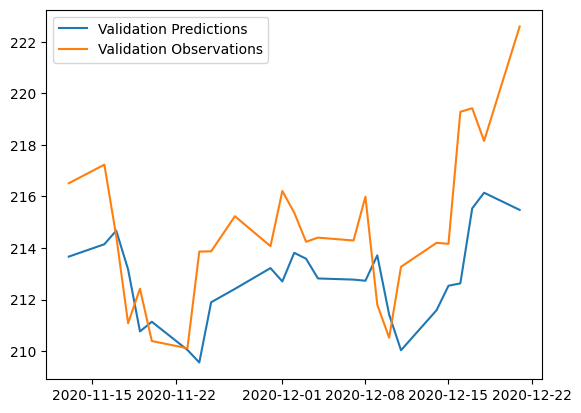

In [23]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


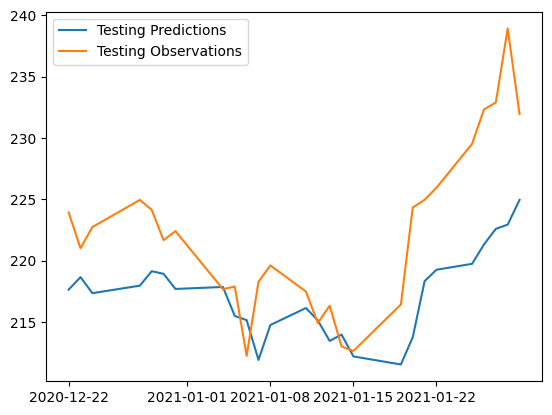

In [24]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

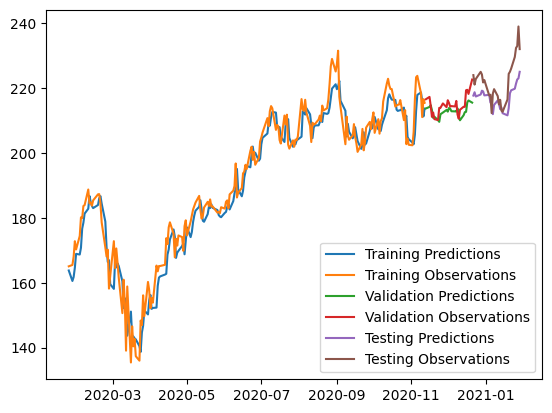

In [25]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [26]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━

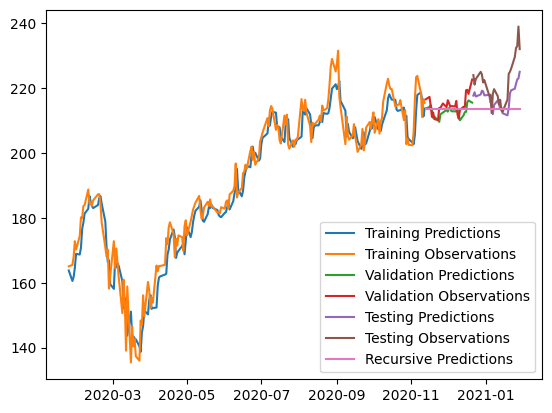

In [27]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])